 Auth: Mawaba P. DAO

 02/14/2021

 Florida Institute of Technology
 
 Digital Image Processing: ECE5256 (Dr. Kozaitis)


Proj 3 write up:
    
    In part 1 of this notebook we load and crop an image to 512x512, we then generate 15x15 nonsymmetric kernel and use 
    it for both a correlation and convolution. In part 2, a 2D correlation is performed between an image of text, and an image 
    of a charachter from that text. From the correlated image we observe that slightly brighter spots correspond to locations of
    the character we used. Then a subimage of the orginal image, centered on a letter is obtained. On this subibmage we find 
    the highest and second highest correlation peaks and compute their ratio.
    After normalization of the correlated image, the ratio is re-computed. 
    Finally, in part 3 we compare the frequency responses of a laplacian and an all-ones spatial filter applied to a known signal.

In [398]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib import cm
from matplotlib.patches import Arrow, Circle

# 1 - ) Correlation and convolution

In [399]:
resise = 0
imgPath = "./imgs/e_musk.png"
img = cv2.imread(imgPath, 0)
if resise:
    dim = (512, 512)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
#Normalize:
img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)


In [400]:
mask = np.zeros((15,15), dtype=np.uint8)
pts= np.array([[0,0], [0, 15], [15, 15]], np.int32)
mask = cv2.fillPoly(mask, [pts], color=(255, 255, 255))



Large image:


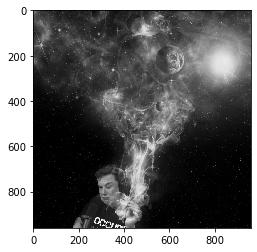

Small image


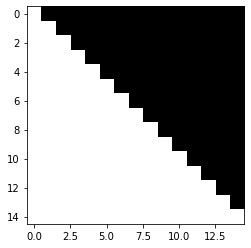

In [401]:
print('Large image:')
plt.imshow(img, cmap="gray")
plt.show()
print("Small image")
plt.imshow(mask, cmap="gray")

Convolution result:


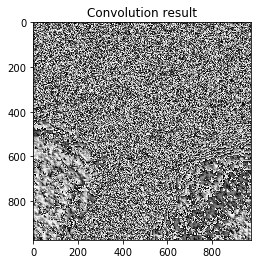

Correlation result:


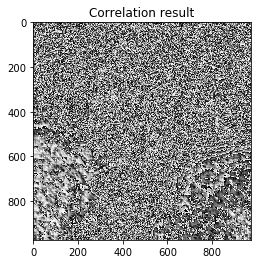

In [402]:
conv_img = signal.convolve2d(img, mask, boundary='symm', mode='full')
corr_img = signal.correlate2d(img, mask, boundary='symm', mode='full')
print("Convolution result:")
plt.title("Convolution result")
plt.imshow(conv_img, cmap="gray")
plt.show()
print("Correlation result:")
plt.title("Correlation result")
plt.imshow(corr_img, cmap="gray")

# 2 - ) Matched filtering

## a - ) 2D Corr and character identification

In [403]:
img_path = "./imgs/dem_hym2.png"
kernel_path = "./imgs/etta_kernel.png"
etax = 213
etay = 268
img = cv2.imread(img_path, 0)
img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
img = cv2.equalizeHist(img) #Enhance for better contrast
dim = (512, 512)
img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
loc = [etax-15, etax+18, etay-8, etay+3]
kernel = img[loc[0]:loc[1],loc[2]:loc[3]]



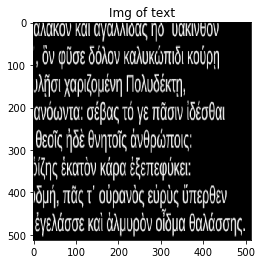

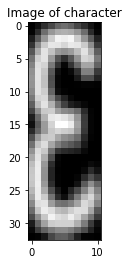

In [404]:
plt.imshow(img, cmap="gray")
plt.title('Img of text')
plt.show()
plt.title('Image of character')
plt.imshow(kernel, cmap="gray")

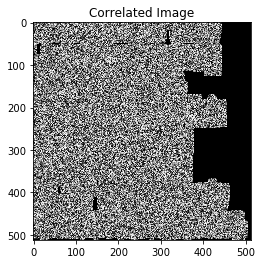

In [405]:
corr_img = signal.correlate2d(img, kernel, boundary='symm', mode='same')
plt.imshow(corr_img, cmap="gray")
plt.title('Correlated Image')
plt.show()

From the correlated image above, although the bright spots are sublte and hard to distinguish we can observe that they correspond to locations of the letter $\epsilon$ which is the charchter used in the correlation. The image below highlihts one such location with a white rectangle.

Text(0.5, 1.0, 'Correlated Image with bright spot highlighted')

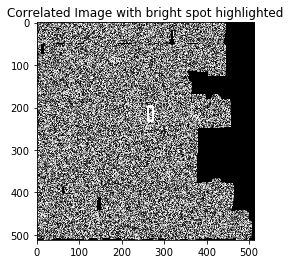

In [406]:
start_point = (loc[2], loc[0]) 
end_point = (loc[3],loc[1]) 
color = (255, 0, 0) 
thickness = 3
image = corr_img.copy()
image = cv2.rectangle(image, start_point, end_point, color, thickness) 
plt.imshow(image, cmap="gray")
plt.title('Correlated Image with bright spot highlighted')

The correlation surface plot below serves as an even better visualization of the identification of the character $\epsilon$. The red areas indicate peaks that correspond to the character.

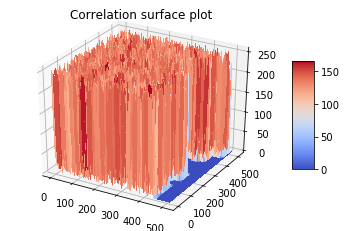

In [407]:
xp = corr_img.shape[1]
yp = corr_img.shape[0]
fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
X = np.arange(0, xp, 1)
Y = np.arange(0, yp, 1)
X, Y = np.meshgrid(X, Y)
Z = corr_img
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title("Correlation surface plot")
plt.show()

The correlation surface p

## b - ) Highest peaks ratio

In [408]:
def compute_ratio(matrix, loc, hi1=1, hi2=2):
    letter = matrix[loc[0]:loc[1], loc[2]:loc[3]]
    #flatten, sort and remove duplicates 
    flat = letter.flatten()
    flat.sort()
    res = []
    [res.append(x) for x in flat if x not in res] 
    peak1, peak2 = res[len(res)-hi1], res[len(res)-hi2]
    ratio = peak1/peak2
    return ratio

loc = [etax-15, etax+18, etay-8, etay+3]
letter = corr_img[loc[0]:loc[1], loc[2]:loc[3]]
# plt.imshow(letter)
ratio = compute_ratio(corr_img, [loc[0],loc[1],loc[2],loc[3]])
print(f'Corr ratio: {ratio}')



Corr ratio: 1.007905125617981


## c - ) Correlation normalization

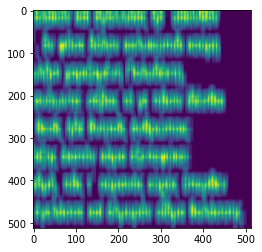

<ipython-input-409-17214a8a3c97>:6: RuntimeWarning: invalid value encountered in true_divide
  normCorr_img = np.divide(corr_img, conv_img)


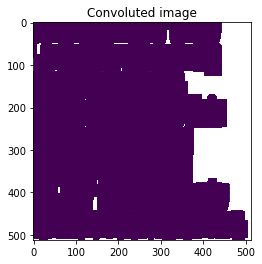

In [409]:
convKern = np.ones((kernel.shape[0], kernel.shape[1]))
conv_img = signal.convolve2d(img, convKern, boundary='symm', mode='same')
plt.imshow(conv_img)
plt.show()
plt.title("Convoluted image")
normCorr_img = np.divide(corr_img, conv_img)
plt.imshow(normCorr_img)

## d - ) Peaks ratio after normalization

In [410]:

ratio = compute_ratio(normCorr_img, [loc[0],loc[1],loc[2],loc[3]])
print(f'New corr ratio: {ratio}')


New corr ratio: 1.0585348950031188


# 3 -) Frequency response of spatial filtering

Please note that I used an array of 512 ones as my vector and not 512 zeros. The difference in frequency response could not be observed with a 0 input signal.

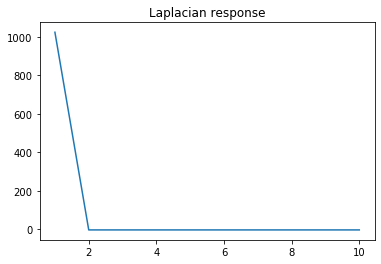

Text(0.5, 1.0, "All one's response")

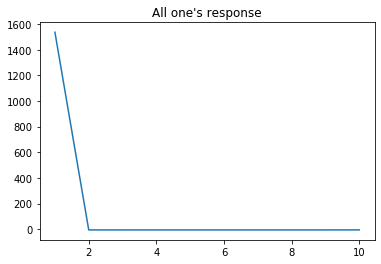

In [411]:
all1 = np.ones((3))
laplacian = np.array([-1,2,1])
arr = np.ones((512))
lplcConv = np.convolve(arr, laplacian)
all1Conv = np.convolve(arr, all1)
lplcFft = np.fft.fft(lplcConv)
all1Fft = np.fft.fft(all1Conv)
x = np.linspace(1,len(lplcFft),len(lplcFft))
plt.plot(x[:10], lplcFft[:10])
plt.title('Laplacian response')
plt.show()
plt.plot(x[:10], all1Fft[:10])
plt.title("All one's response")
# x
# print(np.abs(lplcFft[0])
# print(all1Conv)


At the first location of the vector, the frequency response alfter all-one's filtering is stronger than that after laplacian filtering.